In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [4]:
acd=pd.read_csv('avocadofull.csv')

In [4]:
acd.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [5]:
acd.dtypes

Unnamed: 0        int64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

In [6]:
acd.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [7]:
acd.shape

(18249, 14)

In [8]:
acd.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [9]:
acd.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [10]:
#Changing the date(object type ) into date type

acd['Date']=pd.to_datetime(acd['Date'])


In [11]:
acd.dtypes

Unnamed: 0               int64
Date            datetime64[ns]
AveragePrice           float64
Total Volume           float64
4046                   float64
4225                   float64
4770                   float64
Total Bags             float64
Small Bags             float64
Large Bags             float64
XLarge Bags            float64
type                    object
year                     int64
region                  object
dtype: object

In [12]:
#Adding month and day columns for the date

acd['Month']=acd['Date'].apply(lambda x:x.month)
acd['Day']=acd['Date'].apply(lambda x: x.day)

In [13]:
acd.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,6
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29


In [14]:
#Data preprocessing
#Dropping unnamed column

acd.drop('Unnamed: 0',axis=1,inplace=True)

In [15]:
acd.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,6
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29


In [16]:
a=acd.groupby('type')['Total Volume'].agg('sum')
print(a)


type
conventional    1.508722e+10
organic         4.361817e+08
Name: Total Volume, dtype: float64


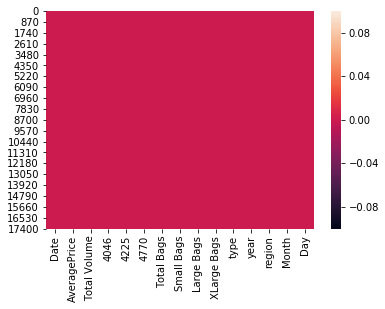

In [17]:
sbn.heatmap(acd.isnull())

In [18]:
acd.columns.value_counts()

Month           1
Total Bags      1
4770            1
4225            1
Date            1
Day             1
year            1
AveragePrice    1
type            1
Large Bags      1
4046            1
region          1
Small Bags      1
XLarge Bags     1
Total Volume    1
dtype: int64

In [19]:
acd.tail()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico,2,4
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico,1,28
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico,1,21
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico,1,14
18248,2018-01-07,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico,1,7


In [20]:
acd.type.unique()

array(['conventional', 'organic'], dtype=object)

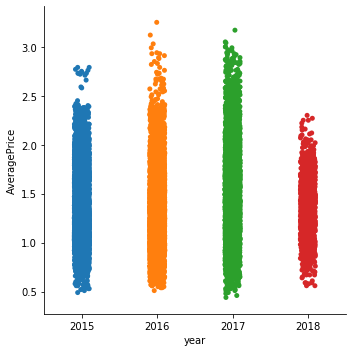

In [21]:
#predicting the price of avocado with features.

#EDA

sbn.catplot('year','AveragePrice',data=acd)

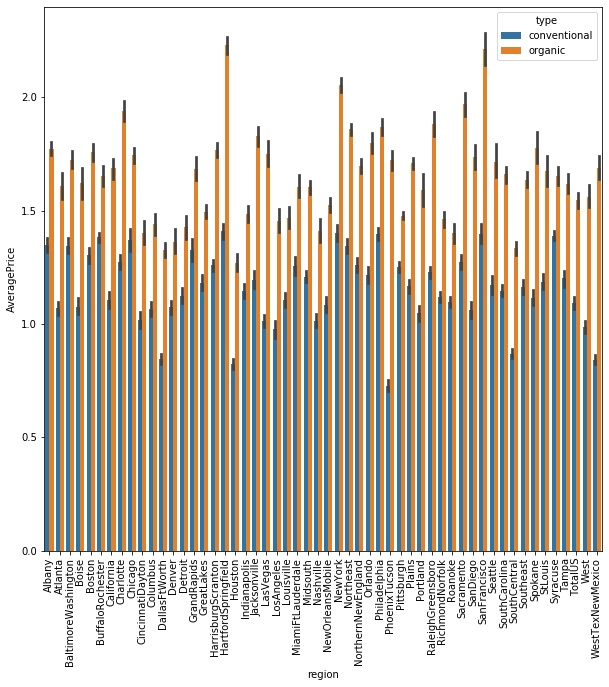

In [22]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.xticks(rotation=90)
sbn.barplot('region','AveragePrice',hue='type',data=acd)
plt.show()

In [23]:
acd['AveragePrice'].max()

3.25

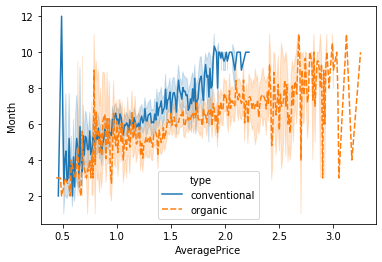

In [24]:
sbn.lineplot('AveragePrice','Month',hue='type',style='type',data=acd)

In [25]:
avgpri_reg=(acd.groupby(['AveragePrice','region']))

In [26]:
avgpri_reg.tail()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,6
6,2015-11-15,0.99,83453.76,1368.92,73672.72,93.26,8318.86,8196.81,122.05,0.0,conventional,2015,Albany,11,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico,2,4
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico,1,28
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico,1,21
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico,1,14


In [27]:
acd.groupby(['AveragePrice'])['region'].value_counts()

AveragePrice  region           
0.44          CincinnatiDayton     1
0.46          PhoenixTucson        1
0.48          Detroit              1
0.49          CincinnatiDayton     1
              PhoenixTucson        1
                                  ..
3.04          RaleighGreensboro    1
3.05          MiamiFtLauderdale    1
3.12          SanFrancisco         1
3.17          Tampa                1
3.25          SanFrancisco         1
Name: region, Length: 6359, dtype: int64

In [28]:
acd['region'].value_counts()

SouthCentral           338
Houston                338
BaltimoreWashington    338
PhoenixTucson          338
Spokane                338
Orlando                338
Philadelphia           338
Syracuse               338
California             338
Atlanta                338
Boston                 338
DallasFtWorth          338
HarrisburgScranton     338
West                   338
LasVegas               338
Detroit                338
Roanoke                338
Midsouth               338
CincinnatiDayton       338
Nashville              338
Pittsburgh             338
Columbus               338
SanDiego               338
Portland               338
Charlotte              338
RichmondNorfolk        338
Southeast              338
BuffaloRochester       338
Chicago                338
NewOrleansMobile       338
TotalUS                338
Denver                 338
HartfordSpringfield    338
Albany                 338
Indianapolis           338
NorthernNewEngland     338
SouthCarolina          338
L

In [29]:
Albany=acd.loc[acd['region']=='Albany']
Albany

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,6
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17608,2018-02-04,1.52,4124.96,118.38,420.36,0.00,3586.22,3586.22,0.00,0.0,organic,2018,Albany,2,4
17609,2018-01-28,1.32,6987.56,433.66,374.96,0.00,6178.94,6178.94,0.00,0.0,organic,2018,Albany,1,28
17610,2018-01-21,1.54,3346.54,14.67,253.01,0.00,3078.86,3078.86,0.00,0.0,organic,2018,Albany,1,21
17611,2018-01-14,1.47,4140.95,7.30,301.87,0.00,3831.78,3831.78,0.00,0.0,organic,2018,Albany,1,14


In [30]:
Albany['AveragePrice'].mean()

1.5610355029585792

In [31]:
#finding the average price of avocado with respect to  all regions

avgregion_pr=acd.groupby(['region']).apply(lambda x:x.mean())


In [32]:
avgregion_pr

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month,Day
region,,,,,,,,,,,,
Albany,1.561036,4.753787e+04,1.824082e+03,3.762121e+04,162.832337,7.929747e+03,6.647765e+03,1.153496e+03,128.488639,2016.147929,6.177515,15.662722
Atlanta,1.337959,2.621453e+05,1.461169e+05,3.121851e+04,311.385769,8.449856e+04,5.160573e+04,3.207004e+04,822.786036,2016.147929,6.177515,15.662722
BaltimoreWashington,1.534231,3.985619e+05,3.565622e+04,2.459829e+05,12466.730976,1.044561e+05,1.009397e+05,2.903985e+03,612.382722,2016.147929,6.177515,15.662722
Boise,1.348136,4.264257e+04,2.001951e+04,3.461682e+03,3186.787840,1.597459e+04,1.384004e+04,2.103634e+03,30.915207,2016.147929,6.177515,15.662722
Boston,1.530888,2.877929e+05,4.994610e+03,2.142199e+05,4982.294970,6.359609e+04,5.890659e+04,4.438365e+03,251.124231,2016.147929,6.177515,15.662722
BuffaloRochester,1.516834,6.793630e+04,1.776671e+03,3.166395e+04,144.335976,3.435134e+04,3.037998e+04,3.729050e+03,242.313432,2016.147929,6.177515,15.662722
California,1.395325,3.044324e+06,1.180376e+06,1.039915e+06,94204.276746,7.298290e+05,6.778038e+05,3.642585e+04,15599.342929,2016.147929,6.177515,15.662722
Charlotte,1.606036,1.051939e+05,2.237814e+04,3.662802e+04,11578.467574,3.460930e+04,3.149069e+04,2.912684e+03,205.927781,2016.147929,6.177515,15.662722
Chicago,1.556775,3.955690e+05,3.208308e+04,2.545190e+05,59069.204290,4.989763e+04,4.377116e+04,5.005547e+03,1120.925178,2016.147929,6.177515,15.662722


In [33]:
avgre_final=avgregion_pr.iloc[:,:1]
avgre_final.head()

,AveragePrice
region,
Albany,1.561036
Atlanta,1.337959
BaltimoreWashington,1.534231
Boise,1.348136
Boston,1.530888


In [34]:
type(avgre_final)

pandas.core.frame.DataFrame

In [35]:
avgre_final.columns

Index(['AveragePrice'], dtype='object')

In [36]:
avgre_final.shape

(54, 1)

In [37]:
#resetting the index as column
avgreset_in=avgre_final.reset_index()
avgreset_in.head()


,region,AveragePrice
0,Albany,1.561036
1,Atlanta,1.337959
2,BaltimoreWashington,1.534231
3,Boise,1.348136
4,Boston,1.530888


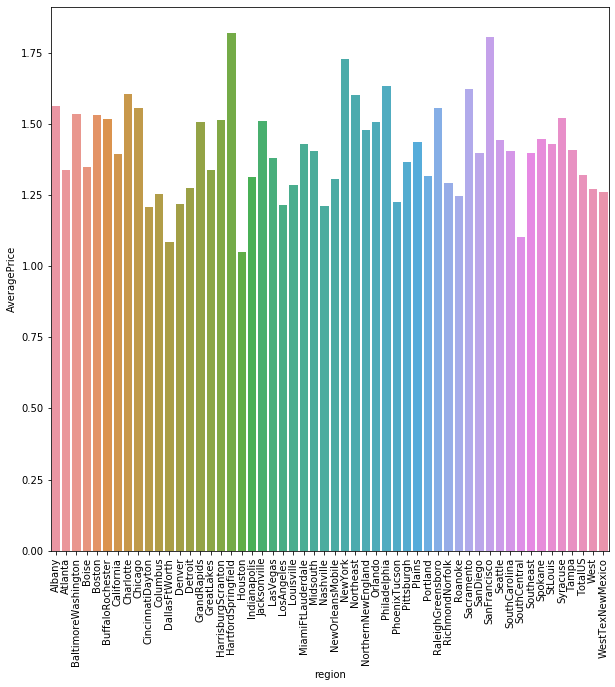

In [38]:
#plotting the average price calculated with respect to corresponding region
plt.figure(figsize=(10,10))
sbn.barplot('region','AveragePrice',data=avgreset_in)
plt.xticks(rotation=90)
plt.show()

In [39]:
avgreset_in['AveragePrice'].max()

1.8186390532544363

In [40]:
avgreset_in['AveragePrice'].min()

1.0479289940828398

In [41]:
#Top 5 Regions with highest average price

avgreset_in.nlargest(5,'AveragePrice')

,region,AveragePrice
17,HartfordSpringfield,1.818639
42,SanFrancisco,1.804201
28,NewYork,1.727574
32,Philadelphia,1.632130
40,Sacramento,1.621568


In [42]:
acd.region.unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

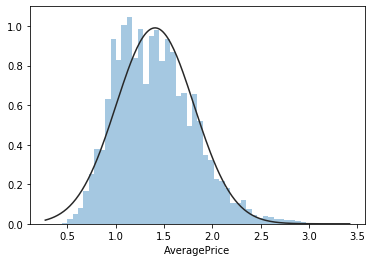

In [43]:
from scipy.stats import norm
sbn.distplot(acd['AveragePrice'],kde=False,fit=norm)

In [44]:
avgpr_region=acd.groupby(['region'])['AveragePrice'].value_counts()

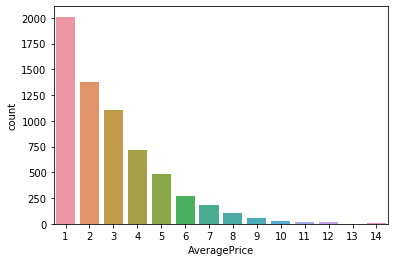

In [45]:
sbn.countplot(avgpr_region)

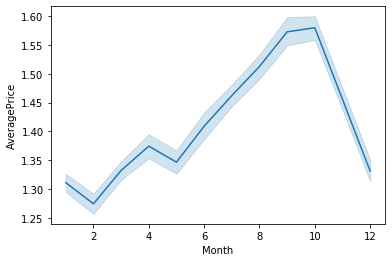

In [46]:
sbn.lineplot('Month','AveragePrice',data=acd)

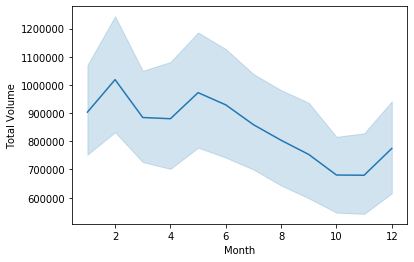

In [47]:
sbn.lineplot('Month','Total Volume',data=acd)

We can observe that as the average price is increased during 8th-10th month and total volume is decreased during the same period of time.

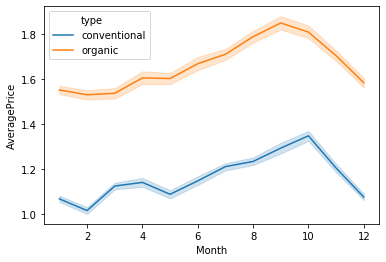

In [48]:
#Lets see which type has more demand over the span of months

sbn.lineplot('Month','AveragePrice',hue='type',data=acd)

It is observed that average price of both the types are increased during 8th-10th months

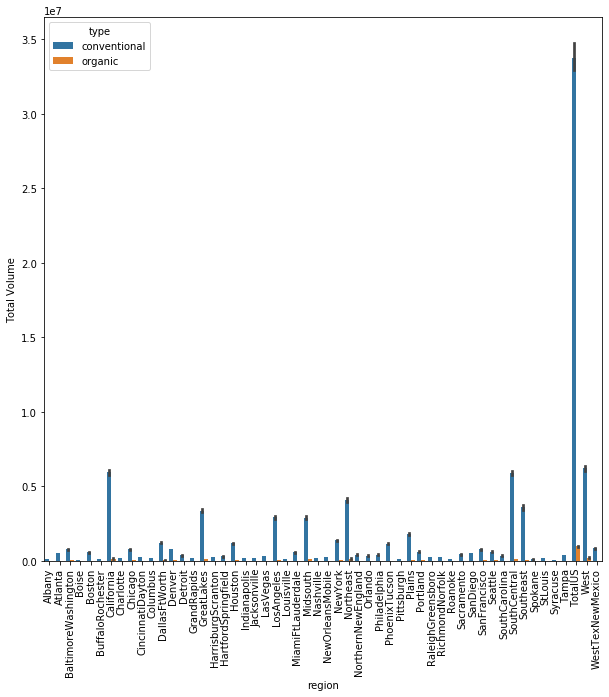

In [49]:
plt.figure(figsize=(10,10))
sbn.barplot('region','Total Volume',hue='type',data=acd)
plt.xticks(rotation=90)

plt.show()

In [50]:
acd['Total Volume'].value_counts()

3713.49      2
3529.44      2
2038.99      2
569349.05    2
4103.97      2
            ..
238229.99    1
344613.01    1
322940.72    1
2943.85      1
10187.56     1
Name: Total Volume, Length: 18237, dtype: int64

In [51]:
acd.region.unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

In [52]:
acd.year.unique()

array([2015, 2016, 2017, 2018], dtype=int64)

In [53]:
acd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 15 columns):
Date            18249 non-null datetime64[ns]
AveragePrice    18249 non-null float64
Total Volume    18249 non-null float64
4046            18249 non-null float64
4225            18249 non-null float64
4770            18249 non-null float64
Total Bags      18249 non-null float64
Small Bags      18249 non-null float64
Large Bags      18249 non-null float64
XLarge Bags     18249 non-null float64
type            18249 non-null object
year            18249 non-null int64
region          18249 non-null object
Month           18249 non-null int64
Day             18249 non-null int64
dtypes: datetime64[ns](1), float64(9), int64(3), object(2)
memory usage: 2.1+ MB


In [54]:
acd.region.value_counts()

SouthCentral           338
Houston                338
BaltimoreWashington    338
PhoenixTucson          338
Spokane                338
Orlando                338
Philadelphia           338
Syracuse               338
California             338
Atlanta                338
Boston                 338
DallasFtWorth          338
HarrisburgScranton     338
West                   338
LasVegas               338
Detroit                338
Roanoke                338
Midsouth               338
CincinnatiDayton       338
Nashville              338
Pittsburgh             338
Columbus               338
SanDiego               338
Portland               338
Charlotte              338
RichmondNorfolk        338
Southeast              338
BuffaloRochester       338
Chicago                338
NewOrleansMobile       338
TotalUS                338
Denver                 338
HartfordSpringfield    338
Albany                 338
Indianapolis           338
NorthernNewEngland     338
SouthCarolina          338
L

In [55]:
acd.corr()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month,Day
AveragePrice,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088,-0.174730,-0.172940,-0.117592,0.093197,0.162409,0.027386
Total Volume,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.967238,0.880640,0.747157,0.017193,-0.024689,-0.009747
4046,-0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,0.699377,0.003353,-0.025803,-0.010159
4225,-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,0.688809,-0.009559,-0.022108,-0.012393
4770,-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,0.679861,-0.036531,-0.033424,-0.009009
Total Bags,-0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,0.994335,0.943009,0.804233,0.071552,-0.022724,-0.004988
Small Bags,-0.174730,0.967238,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,0.806845,0.063915,-0.023126,-0.003870
Large Bags,-0.172940,0.880640,0.838645,0.810015,0.698471,0.943009,0.902589,1.000000,0.710858,0.087891,-0.020187,-0.008352
XLarge Bags,-0.117592,0.747157,0.699377,0.688809,0.679861,0.804233,0.806845,0.710858,1.000000,0.081033,-0.012969,0.000319
year,0.093197,0.017193,0.003353,-0.009559,-0.036531,0.071552,0.063915,0.087891,0.081033,1.000000,-0.177050,0.004475


In [56]:
acd.groupby(['region','Small Bags']).max()

Date  AveragePrice  Total Volume       4046  \
region           Small Bags                                                     
Albany           503.44     2015-09-20          1.98        774.20      42.63   
                 660.11     2015-09-27          1.98        814.13      13.79   
                 732.35     2016-06-12          1.43        887.29       4.66   
                 736.96     2015-11-29          1.94        831.69       0.00   
                 755.69     2015-11-22          1.94        858.83      13.84   
...                                ...           ...           ...        ...   
WestTexNewMexico 187139.46  2016-07-10          0.87     979053.68  571522.50   
                 192156.83  2017-07-09          0.84    1083015.10  549857.13   
                 204702.97  2016-10-16          0.87     902725.42  490768.42   
                 212681.56  2016-07-03          0.86    1026317.80  581532.54   
                 243993.80  2016-06-26          0.80    1028845.61  558419.63   

                                  4225      4770  Total Bags  Large Bags  \
region           Small Bags                                                
Albany           503.44         228.13      0.00      503.44        0.00   
                 660.11         140.23      0.00      660.11        0.00   
                 732.35         150.28      0.00      732.35        0.00   
                 736.96          94.73      0.00      736.96        0.00   
                 755.69          84.18      0.00      760.81        5.12   
...                                ...       ...         ...         ...   
WestTexNewMexico 187139.46   102689.06  16968.44   287873.68    87776.17   
                 192156.83   109308.70   8436.06   415413.21   223256.38   
                 204702.97    72347.94  13559.50   326049.56   121346.59   
                 212681.56   106150.45  20212.32   318422.49    91214.82   
                 243993.80   101284.45  23127.35   346014.18    95170.94   

                             XLarge Bags          type  year  Month  Day  
region           Small Bags                                               
Albany           503.44             0.00       organic  2015      9   20  
                 660.11             0.00       organic  2015      9   27  
                 732.35             0.00       organic  2016      6   12  
                 736.96             0.00       organic  2015     11   29  
                 755.69             0.00       organic  2015     11   22  
...                                  ...           ...   ...    ...  ...  
WestTexNewMexico 187139.46      12958.05  conventional  2016      7   10  
                 192156.83          0.00  conventional  2017      7    9  
                 204702.97          0.00  conventional  2016     10   16  
                 212681.56      14526.11  conventional  2016      7    3  
                 243993.80       6849.44  conventional  2016      6   26  

[17992 rows x 13 columns]

In [57]:
acd.corr()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month,Day
AveragePrice,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088,-0.174730,-0.172940,-0.117592,0.093197,0.162409,0.027386
Total Volume,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.967238,0.880640,0.747157,0.017193,-0.024689,-0.009747
4046,-0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,0.699377,0.003353,-0.025803,-0.010159
4225,-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,0.688809,-0.009559,-0.022108,-0.012393
4770,-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,0.679861,-0.036531,-0.033424,-0.009009
Total Bags,-0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,0.994335,0.943009,0.804233,0.071552,-0.022724,-0.004988
Small Bags,-0.174730,0.967238,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,0.806845,0.063915,-0.023126,-0.003870
Large Bags,-0.172940,0.880640,0.838645,0.810015,0.698471,0.943009,0.902589,1.000000,0.710858,0.087891,-0.020187,-0.008352
XLarge Bags,-0.117592,0.747157,0.699377,0.688809,0.679861,0.804233,0.806845,0.710858,1.000000,0.081033,-0.012969,0.000319
year,0.093197,0.017193,0.003353,-0.009559,-0.036531,0.071552,0.063915,0.087891,0.081033,1.000000,-0.177050,0.004475


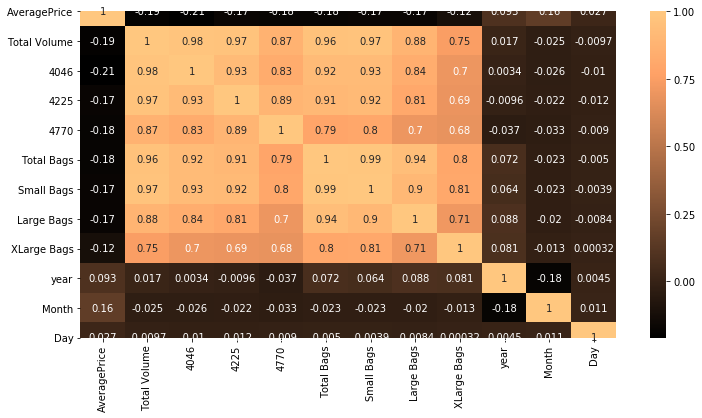

In [58]:
plt.figure(figsize=(12,6))
sbn.heatmap(acd.corr(),cmap='copper',annot=True)

In [59]:
from sklearn.preprocessing import StandardScaler

In [60]:
from scipy.stats import zscore

In [61]:
acd.dtypes

Date            datetime64[ns]
AveragePrice           float64
Total Volume           float64
4046                   float64
4225                   float64
4770                   float64
Total Bags             float64
Small Bags             float64
Large Bags             float64
XLarge Bags            float64
type                    object
year                     int64
region                  object
Month                    int64
Day                      int64
dtype: object

In [62]:
data=pd.get_dummies(acd.drop(['Date','region'],axis=1),drop_first=True)

In [63]:
data.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month,Day,type_organic
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015,12,27,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015,12,20,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015,12,13,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015,12,6,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015,11,29,0


In [86]:
data.shape

(18249, 13)

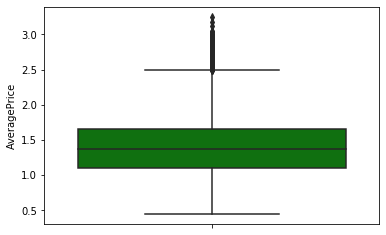

In [96]:
#checking outliers (if any)
sbn.boxplot(data['AveragePrice'],color='green',orient='v')


In [97]:

from scipy.stats import zscore
z_sc=np.abs(zscore(data))
z_sc

array([[0.18868864, 0.22771641, 0.23081597, ..., 1.64763162, 1.29185687,
        0.99983562],
       [0.13901962, 0.23042664, 0.23110251, ..., 1.64763162, 0.49423066,
        0.99983562],
       [1.18206895, 0.21208462, 0.23100731, ..., 1.64763162, 0.30339555,
        0.99983562],
       ...,
       [1.15237477, 0.24233073, 0.2306933 , ..., 1.46495942, 0.60817726,
        1.00016441],
       [1.30138182, 0.24162464, 0.2304279 , ..., 1.46495942, 0.18944895,
        1.00016441],
       [0.53151208, 0.24125273, 0.22934712, ..., 1.46495942, 0.98707516,
        1.00016441]])

In [98]:
ndata=data[(z_sc<3).all(axis=1)]
ndata

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month,Day,type_organic
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015,12,27,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015,12,20,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015,12,13,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015,12,6,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015,11,29,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,2018,2,4,1
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,2018,1,28,1
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,2018,1,21,1
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,2018,1,14,1


In [99]:
data.shape

(18249, 13)

In [100]:
ndata.shape

(17651, 13)

In [101]:
x=ndata.drop('AveragePrice',axis=1)
x.head()

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month,Day,type_organic
0,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015,12,27,0
1,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015,12,20,0
2,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015,12,13,0
3,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015,12,6,0
4,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015,11,29,0


In [102]:
y=pd.DataFrame(ndata['AveragePrice'])

In [103]:
y.head()

,AveragePrice
0,1.33
1,1.35
2,0.93
3,1.08
4,1.28


In [104]:
x.shape

(17651, 12)

In [105]:
y.shape

(17651, 1)

In [163]:
x.skew()

Total Volume    3.767138
4046            4.909848
4225            4.455745
4770            5.117170
Total Bags      4.066771
Small Bags      4.222706
Large Bags      5.053434
XLarge Bags     6.135607
year            0.229976
Month           0.107408
Day             0.011778
type_organic   -0.037741
dtype: float64

In [164]:
for col in x.columns:
    if x.skew().loc[col]>0.55:
        x[col]=np.log1p(x[col])

In [165]:
x.skew()

Total Volume   -0.049950
4046           -0.420273
4225           -0.604619
4770            0.068532
Total Bags     -0.384493
Small Bags     -0.788988
Large Bags     -0.610874
XLarge Bags     1.216238
year            0.229976
Month           0.107408
Day             0.011778
type_organic   -0.037741
dtype: float64

In [175]:
x.drop(['Small Bags','Large Bags','XLarge Bags'],axis=1,inplace=True)

In [176]:
#Scaling all the features so that weightage of columns spread equally.
sc=StandardScaler()
scx=sc.fit_transform(x)
scx=pd.DataFrame(scx,columns=x.columns)

In [177]:
scx.skew()

Total Volume   -0.049950
4046           -0.420273
4225           -0.604619
4770            0.068532
Total Bags     -0.384493
year            0.229976
Month           0.107408
Day             0.011778
type_organic   -0.037741
dtype: float64

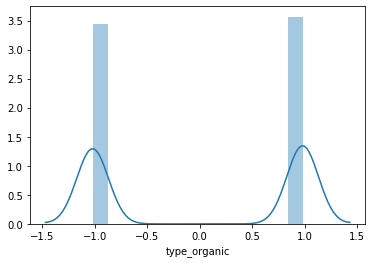

In [179]:
sbn.distplot(scx['type_organic'])

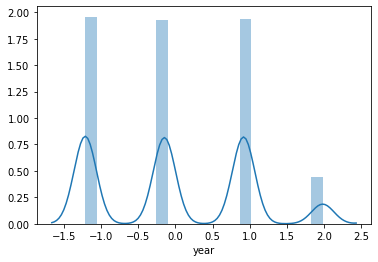

In [171]:
sbn.distplot(scx['year'])

In [180]:
scx.size

158859

In [181]:
scx.shape

(17651, 9)

In [182]:
from sklearn.decomposition import PCA

In [183]:
#Reducing dimension space to minimize the complexity and observing the explained variance ratio.

pca=PCA(n_components=5)
pcx=pca.fit_transform(x)

In [184]:
pcx.shape

(17651, 5)

In [185]:
pcx

array([[11.35188291,  1.42152266,  5.78046037,  0.56637137, -1.75385006],
       [ 4.35379924,  1.64695006,  5.82252506,  1.0161889 , -1.79480071],
       [-2.65061103,  0.52122618,  5.87993887,  1.30939241, -2.21852628],
       ...,
       [ 5.29916447,  1.3616439 , -5.28785574,  2.88337833,  1.10547119],
       [-1.70239925,  1.08751026, -5.24517839,  2.66796264,  1.04290206],
       [-8.70294367,  1.57631755, -5.22432605,  1.41972667,  1.22127792]])

In [232]:
#seperating the trianing and testing samples.

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=45)

In [233]:
#Implementing the linear models 


lr=LinearRegression(normalize=True)
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [234]:
predy=lr.predict(x_test)
print('Mean Absolute Error:',mean_absolute_error(y_test,predy))
print('Mean Squared Error:',mean_squared_error(y_test,predy))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,predy)))
print('R2 sCcore is:',r2_score(y_test,predy))

Mean Absolute Error: 0.21308434443539392
Mean Squared Error: 0.07270042651727797
Root Mean Squared Error: 0.26963016618560687
R2 sCcore is: 0.5100700769357895


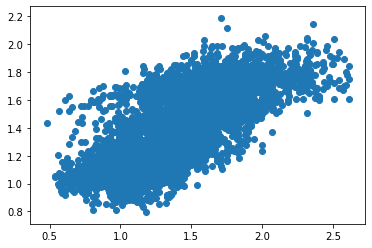

In [235]:
plt.scatter(x=y_test,y=predy)
plt.show()

In [236]:
#Cross validation

cvs=cross_val_score(lr,x_train,y_train,cv=5,scoring='r2')
print(cvs)
print(cvs.mean())
print(cvs.std())

[0.52717139 0.51089482 0.50836805 0.49047265 0.50593058]
0.5085674973391544
0.011712708063871282


In [237]:
#Selecting the random state

def max_r2_score(model,x,y):
    f_r2_score=0
    for rst in range(42,100):
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=rst)
        model.fit(x_train,y_train)
        predm=model.predict(x_test)
        r2s=r2_score(y_test,predm)
        print('r2 score is',r2s,'for the random state',rst)
    
        if r2s>f_r2_score:
            f_r2_score=r2s
    print('max r2 score for the corresponding random state is ',f_r2_score,rst)
    return rst

In [238]:
max_r2_score(lr,pcx,y)

r2 score is 0.34770236115927167 for the random state 42
r2 score is 0.3632344526327954 for the random state 43
r2 score is 0.3333090710578429 for the random state 44
r2 score is 0.34183221701414745 for the random state 45
r2 score is 0.35890171862019604 for the random state 46
r2 score is 0.3578253417007188 for the random state 47
r2 score is 0.36317797947992536 for the random state 48
r2 score is 0.3642912376451263 for the random state 49
r2 score is 0.338035983711643 for the random state 50
r2 score is 0.34549441417323046 for the random state 51
r2 score is 0.34923451765926117 for the random state 52
r2 score is 0.352640117117888 for the random state 53
r2 score is 0.32586955010336816 for the random state 54
r2 score is 0.37177785480779624 for the random state 55
r2 score is 0.3567838518800729 for the random state 56
r2 score is 0.33899895566314453 for the random state 57
r2 score is 0.35394751053106444 for the random state 58
r2 score is 0.34442914986564 for the random state 59
r2 s

99

In [218]:
dtr=DecisionTreeRegressor(criterion='mse')

params={'criterion': ['mse'],
 'max_depth': [None],
 'max_features': [None],
 'max_leaf_nodes': [4,8,16],
 'min_impurity_decrease': [0.0],
 'min_impurity_split': [None],
 'min_samples_leaf': [1,2,4],
 'min_samples_split': [2,4],
 'min_weight_fraction_leaf': [0.0],
 'presort': [False],
 'random_state': [None],
 'splitter': ['best']}


Object `dtr.parameters` not found.


In [213]:
from sklearn.model_selection import GridSearchCV
gcv=GridSearchCV(estimator=dtr,param_grid=params)
gcv.fit(x_train,y_train)
gcv.best_params_

{'criterion': 'mse',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': 16,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': False,
 'random_state': None,
 'splitter': 'best'}

In [239]:
#Decision Tree Regressor

dtr=DecisionTreeRegressor(criterion='mse',
 max_leaf_nodes=16,
 min_impurity_decrease=0.0,
 min_samples_leaf= 4,
 min_samples_split=4,
 splitter='best')
dtr.fit(x_train,y_train)
dtrpr=dtr.predict(x_test)
print('Mean Absolute Error:',mean_absolute_error(y_test,dtrpr))
print('Mean Squared Error:',mean_squared_error(y_test,dtrpr))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,dtrpr)))
print('R2 sCcore is:',r2_score(y_test,dtrpr))


Mean Absolute Error: 0.2099800888180715
Mean Squared Error: 0.07371308944875055
Root Mean Squared Error: 0.27150154594173226
R2 sCcore is: 0.5032457170816087


In [243]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score

model=GradientBoostingRegressor()
model.fit(x_train,y_train)
predm=model.predict(x_test)
print('mean r2 score for gradient boosting regressor is',cross_val_score(model,x_train,y_train,cv=5,scoring='r2').mean())

mean r2 score for gradient boosting regressor is 0.679621632682568


In [231]:
data

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month,Day,type_organic
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015,12,27,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015,12,20,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015,12,13,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015,12,6,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015,11,29,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,2018,2,4,1
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,2018,1,28,1
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,2018,1,21,1
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,2018,1,14,1


In [253]:
adb=AdaBoostRegressor(base_estimator=lr,n_estimators=10)
adb.fit(x_train,y_train)
predadb=adb.predict(x_test)
print('mean r2 score for adaboost regressor is',cross_val_score(lr,x_train,y_train,cv=5,scoring='r2').mean())


mean r2 score for adaboost regressor is 0.5085674973391544


In [248]:
model=GradientBoostingRegressor()
model.fit(x_train,y_train)
predm=model.predict(x_test)
print('mean r2 score for gradient boosting regressor is',cross_val_score(model,x_train,y_train,cv=5,scoring='r2').mean())

mean r2 score for gradient boosting regressor is 0.6795991983245584


In [254]:
#Lets check with KNN regressor

from sklearn.neighbors import KNeighborsRegressor
knr=KNeighborsRegressor(n_neighbors=3)
knr.fit(x_train,y_train)
knrp=knr.predict(x_test)
print('mean r2 score for kNeighbor regressor is',cross_val_score(knr,x_train,y_train,cv=5,scoring='r2').mean())
print

mean r2 score for kNeighbor regressor is 0.5153505856589671


In [256]:
#Lets use RandomForest

from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
rfp=rf.predict(x_test)
print('mean r2 score for kNeighbor regressor is',cross_val_score(rf,x_train,y_train,cv=5,scoring='r2').mean())

mean r2 score for kNeighbor regressor is 0.8120129933397229


In [257]:
#Fitting the best model
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
rfp=rf.predict(x_test)
print('Mean Absolute Error:',mean_absolute_error(y_test,rfp))
print('Mean Squared Error:',mean_squared_error(y_test,rfp))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,rfp)))
print('Mean R2 sCcore is:',r2_score(y_test,rfp).mean())


Mean Absolute Error: 0.11241812564366632
Mean Squared Error: 0.025915202883625126
Root Mean Squared Error: 0.16098199552628586
Mean R2 sCcore is: 0.8253568243929025


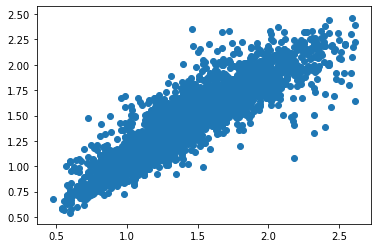

In [259]:
#plotting actual vs predicted

plt.scatter(y_test,rfp)
plt.show()

In [261]:
rfp

array([1.127, 2.071, 1.18 , ..., 2.301, 1.17 , 1.086])

In [263]:
#Saving the predicted values to csv

rfp=pd.DataFrame(rfp,columns=['AveragePrice'])

In [264]:
rfp.head()

,AveragePrice
0,1.127
1,2.071
2,1.180
3,1.336
4,0.936


In [265]:
y_test.head()

,AveragePrice
2467,1.16
13045,2.16
14684,1.23
8997,1.43
4237,0.93


In [266]:
#Saving to csv
rfp.to_csv('predictedavgpriceavocado.csv',index=False)


In [267]:
#Saving model
import pickle

pickle_file='bball.pkl'
with open (pickle_file,'wb') as file:
    pickle.dump(rf,file)

# Classification of the Region of avocado

#label=Region

In [5]:
acd.dtypes

Unnamed: 0        int64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

In [6]:
ady=acd['region']
ady.tail()

18244    WestTexNewMexico
18245    WestTexNewMexico
18246    WestTexNewMexico
18247    WestTexNewMexico
18248    WestTexNewMexico
Name: region, dtype: object

In [7]:
acdy=pd.DataFrame(acd,columns=['region'])

In [8]:
acdy.head()

,region
0,Albany
1,Albany
2,Albany
3,Albany
4,Albany


In [10]:
acdy.shape

(18249, 1)

In [13]:
acdn=acd.drop(['region','Date'],axis=1)
acdn.head()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year
0,0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015
1,1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015
2,2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015
3,3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015
4,4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015


In [12]:
acdn.shape

(18249, 12)

In [13]:
acdn.dtypes

Unnamed: 0        int64
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
dtype: object

In [14]:
#As type column contains two types, we can divide them into two columns effectively.

acdn=pd.get_dummies(acdn)
acdn.head()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,type_conventional,type_organic
0,0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015,1,0
1,1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015,1,0
2,2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015,1,0
3,3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015,1,0
4,4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015,1,0


In [14]:
acdn.drop('Unnamed: 0',axis=1,inplace=True)

In [16]:
acdn.tail()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,type_conventional,type_organic
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,2018,0,1
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,2018,0,1
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,2018,0,1
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,2018,0,1
18248,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,2018,0,1


In [15]:
acdn.shape

(18249, 11)

In [18]:
acdy.head()

,region
0,Albany
1,Albany
2,Albany
3,Albany
4,Albany


In [16]:
acdy['region'].dtype

dtype('O')

In [9]:
#Changing the dtype of region from object to int so that system can understand

#Using Label encoder (Using OneHot Encoder will increase the no of columns and makes more complex to handle)
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le.fit(acdy)
y=pd.DataFrame(le.transform(acdy),columns=['Region'])
y


,Region
0,0
1,0
2,0
3,0
4,0
...,...
18244,53
18245,53
18246,53
18247,53


In [21]:
acdy['region'].unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

In [22]:
y['Region'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53], dtype=int64)

In [17]:
acdfin=pd.concat([acdn,y],axis=1)
acdfin.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,Region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,0


In [24]:
acdfin.tail()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,type_conventional,type_organic,Region
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,2018,0,1,53
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,2018,0,1,53
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,2018,0,1,53
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,2018,0,1,53
18248,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,2018,0,1,53


In [18]:
x=acdfin.drop('Region',axis=1)
x.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015


In [19]:
y=acdfin['Region']

In [20]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Region, dtype: int32

In [28]:
#Scaling all the columns to same scale
from sklearn.preprocessing import StandardScaler
scl=StandardScaler()
sclx=scl.fit_transform(x)


In [29]:
y.dtype

dtype('int32')

In [30]:
type(y)

pandas.core.series.Series

In [31]:
y=pd.DataFrame(y,columns=['Region'])

In [32]:
type(y)

pandas.core.frame.DataFrame

In [33]:
y.head()

,Region
0,0
1,0
2,0
3,0
4,0


In [34]:
acdfin.corr()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,type_conventional,type_organic,Region
AveragePrice,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088,-0.174730,-0.172940,-0.117592,0.093197,-0.615845,0.615845,-0.011716
Total Volume,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.967238,0.880640,0.747157,0.017193,0.232434,-0.232434,0.174176
4046,-0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,0.699377,0.003353,0.225819,-0.225819,0.192073
4225,-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,0.688809,-0.009559,0.232289,-0.232289,0.145726
4770,-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,0.679861,-0.036531,0.210027,-0.210027,0.095252
Total Bags,-0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,0.994335,0.943009,0.804233,0.071552,0.217788,-0.217788,0.175256
Small Bags,-0.174730,0.967238,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,0.806845,0.063915,0.220535,-0.220535,0.164702
Large Bags,-0.172940,0.880640,0.838645,0.810015,0.698471,0.943009,0.902589,1.000000,0.710858,0.087891,0.193177,-0.193177,0.198768
XLarge Bags,-0.117592,0.747157,0.699377,0.688809,0.679861,0.804233,0.806845,0.710858,1.000000,0.081033,0.175483,-0.175483,0.082281
year,0.093197,0.017193,0.003353,-0.009559,-0.036531,0.071552,0.063915,0.087891,0.081033,1.000000,0.000032,-0.000032,-0.000055


In [35]:
acdfin.isnull().sum()

AveragePrice         0
Total Volume         0
4046                 0
4225                 0
4770                 0
Total Bags           0
Small Bags           0
Large Bags           0
XLarge Bags          0
year                 0
type_conventional    0
type_organic         0
Region               0
dtype: int64

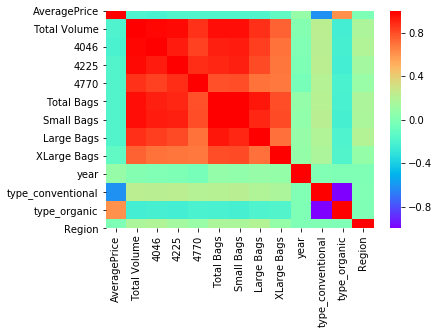

In [36]:
sbn.heatmap(acdfin.corr(),cmap='rainbow')

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [23]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=46)

In [63]:
import warnings
warnings.filterwarnings('ignore')
mnb=MultinomialNB()

score=cross_val_score(mnb,x_train,y_train,cv=5)
print('cvscore',score)
print('mean accuracy',score.mean())
print('std deviation',score.std())


cvscore [0.24625566 0.24658494 0.25834798 0.25634697 0.24796604]
mean accuracy 0.251100317392693
std deviation 0.005171826926710822


In [53]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
rf=RandomForestClassifier()
parameters={'n_estimators':[10,100,500]}
gsc=GridSearchCV(rf,parameters,cv=5,scoring='accuracy')
gsc.fit(x_train,y_train)
gsc.best_params_


{'n_estimators': 500}

In [40]:
rf=RandomForestClassifier(n_estimators=500)
rf.fit(x_train,y_train)
rfp=rf.predict(x_test)
print('Accuracy Score is:',accuracy_score(y_test,rfp))
print('Confusion Matrix is :',confusion_matrix(y_test,rfp))
print('Classification Report:',classification_report(y_test,rfp))

Accuracy Score is: 0.899626400996264
Confusion Matrix is : [[65  0  0 ...  0  0  0]
 [ 0 61  0 ...  0  0  0]
 [ 0  0 73 ...  0  0  0]
 ...
 [ 0  0  0 ... 65  0  0]
 [ 0  0  0 ...  1 74  0]
 [ 0  2  0 ...  0  0 54]]
Classification Report:               precision    recall  f1-score   support

           0       0.86      0.86      0.86        76
           1       0.73      0.79      0.76        77
           2       0.97      0.99      0.98        74
           3       0.97      0.89      0.93        65
           4       1.00      0.97      0.99        77
           5       0.93      0.74      0.82        73
           6       0.99      1.00      0.99        71
           7       0.94      0.93      0.94        88
           8       0.98      0.99      0.98        85
           9       0.85      0.91      0.88        77
          10       0.79      0.78      0.78        67
          11       0.95      0.94      0.94        78
          12       0.92      0.92      0.92        71
     

In [65]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
dtc.score(x_train,y_train)
preddtc=dtc.predict(x_test)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

0.7940224159402242
[[55  0  0 ...  0  0  0]
 [ 0 45  0 ...  0  0  0]
 [ 0  0 70 ...  0  0  1]
 ...
 [ 0  0  0 ... 64  0  0]
 [ 0  0  0 ...  0 72  0]
 [ 0  2  0 ...  0  0 47]]
              precision    recall  f1-score   support

           0       0.86      0.72      0.79        76
           1       0.70      0.58      0.64        77
           2       0.91      0.95      0.93        74
           3       0.77      0.78      0.78        65
           4       0.86      0.83      0.85        77
           5       0.74      0.71      0.73        73
           6       0.97      0.94      0.96        71
           7       0.86      0.88      0.87        88
           8       0.91      0.92      0.91        85
           9       0.72      0.78      0.75        77
          10       0.62      0.63      0.62        67
          11       0.85      0.82      0.84        78
          12       0.87      0.76      0.81        71
          13       0.69      0.66      0.68        76
          14  

In [45]:
from sklearn.neighbors import KNeighborsClassifier
kn=KNeighborsClassifier()
parameters={'n_neighbors':range(1,30)}
gdk=GridSearchCV(kn,parameters,cv=5,scoring='accuracy')
gdk.fit(x_train,y_train)
gdk.best_params_

{'n_neighbors': 1}

In [48]:
kn=KNeighborsClassifier(n_neighbors=1)
kn.fit(x_train,y_train)
knp=kn.predict(x_test)
print('Accuracy of knn',accuracy_score(y_test,knp))
print('Confisuin Matrix',confusion_matrix(y_test,knp))
print('Classification Report',classification_report(y_test,knp))

Accuracy of knn 0.6734744707347448
Confisuin Matrix [[46  0  0 ...  0  0  0]
 [ 0 35  1 ...  0  0  1]
 [ 0  0 61 ...  0  0  0]
 ...
 [ 0  0  0 ... 60  0  0]
 [ 0  0  0 ...  0 64  0]
 [ 0  4  1 ...  0  0 45]]
Classification Report               precision    recall  f1-score   support

           0       0.66      0.61      0.63        76
           1       0.54      0.45      0.49        77
           2       0.79      0.82      0.81        74
           3       0.69      0.65      0.67        65
           4       0.80      0.73      0.76        77
           5       0.63      0.53      0.58        73
           6       0.80      0.83      0.81        71
           7       0.78      0.70      0.74        88
           8       0.89      0.86      0.87        85
           9       0.60      0.74      0.66        77
          10       0.48      0.49      0.49        67
          11       0.62      0.73      0.67        78
          12       0.63      0.65      0.64        71
          13 

In [27]:
#saving the best model

import pickle
pickle_file='region.pkl'
with open (pickle_file,'wb') as file:
    pickle.dump(rf,file)
